# Brexit Data
### Dario Benvenuti, Alba Puy Tapia

## Cleaning and merging the data

### First we want to join our two data sets in which we had the census information of the population of the UK and referendum in which we have the results obtained in the brexit

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#importing the census dataset
data1=pd.io.parsers.read_csv('census.csv', delimiter = ',',index_col= "Code")

In [3]:
data1.head()

,Type,Area,All Residents,Age 0 to 4,Age 5 to 9,Age 10 to 14,Age 15 to 19,Age 20 to 24,Age 25 to 29,Age 30 to 34,...,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84,Age 85 to 89,Age 90 and Over
Code,,,,,,,,,,,,,,,,,,,,,
K02000001,Country,United Kingdom,63182175,3913932,3516698,3669311,3996426,4297158,4306308,4125454,...,4643071,4094427,3614087,3807952,3017482,2462751,2006005,1604771,846836.0,439248.0
K04000001,Country,England and Wales,56075912,3496750,3135711,3258677,3539385,3807245,3836609,3683915,...,4100526,3601694,3183915,3377162,2674161,2178672,1777547,1338005,825671.0,429017.0
E92000001,Country,England,53012456,3318449,2972632,3080929,3340265,3595321,3650881,3509221,...,3879815,3400095,2996992,3172277,2508154,2044129,1669345,1258773,776311.0,403817.0
W92000004,Country,Wales,3063456,178301,163079,177748,199120,211924,185728,174694,...,220711,201599,186923,204885,166007,134543,108202,79232,49360.0,25200.0
N92000002,Country,Northern Ireland,1810863,124382,111287,119034,126241,126013,124099,119839,...,131645,116933,99272,94290,82121,63479,50358,36366,21165.0,10231.0


In [4]:
#importing the referendum dataset
data2=pd.io.parsers.read_csv('referendum.csv', delimiter = ',')

In [5]:
#since the variable we will use to join both tables have a different name we convert it
data2=data2.rename(columns = {"Area Code": "Code"})

In [6]:
#and set it as the index
data2 = data2.set_index('Code')
data2.head()

,ID,Region Code,Region,Area,Electorate,Expected Ballots,Verified Ballot Papers,Percent Turnout,Votes Cast,Valid Votes,Remain,Leave,Rejected Ballots,No Official Mark,Multiple Marks,Writing or Mark,Unmarked or Void,Percent Remain,Percent Leave,Percent Rejected
Code,,,,,,,,,,,,,,,,,,,,
E06000031,108,E12000006,East,Peterborough,120892,87474,87469,72.35,87469,87392,34176,53216,77,0,32,7,38,39.11,60.89,0.09
E06000032,109,E12000006,East,Luton,127612,84633,84636,66.31,84616,84481,36708,47773,135,0,85,0,50,43.45,56.55,0.16
E06000033,112,E12000006,East,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,54522,69,0,21,0,48,41.92,58.08,0.07
E06000034,113,E12000006,East,Thurrock,109897,79969,79954,72.75,79950,79916,22151,57765,34,0,8,3,23,27.72,72.28,0.04
E06000055,110,E12000006,East,Bedford,119530,86136,86136,72.06,86135,86066,41497,44569,69,0,26,1,42,48.22,51.78,0.08


In [7]:
#we delete de columns with na
data1 = data1.dropna(axis='columns')

In [8]:
data2 = data2.dropna(axis='columns')

In [9]:
#we delete ID variable
del data2['ID']

In [10]:
#we generate our dataset
result = data2.join(data1, lsuffix='_census', rsuffix='_referendum')

In [11]:
result =result.dropna()

In [12]:
result.head()

,Region Code,Region,Area_census,Electorate,Expected Ballots,Verified Ballot Papers,Percent Turnout,Votes Cast,Valid Votes,Remain,...,Age 35 to 39,Age 40 to 44,Age 45 to 49,Age 50 to 54,Age 55 to 59,Age 60 to 64,Age 65 to 69,Age 70 to 74,Age 75 to 79,Age 80 to 84
Code,,,,,,,,,,,,,,,,,,,,,
E06000031,E12000006,East,Peterborough,120892,87474,87469,72.35,87469,87392,34176,...,12914.0,13289.0,12677.0,11014.0,9642.0,9382.0,6909.0,5792.0,5026.0,3803.0
E06000032,E12000006,East,Luton,127612,84633,84636,66.31,84616,84481,36708,...,14066.0,13796.0,13538.0,11225.0,9267.0,8346.0,6542.0,6102.0,5032.0,3408.0
E06000033,E12000006,East,Southend-on-Sea,128856,93948,93939,72.90,93939,93870,39348,...,12223.0,13083.0,12755.0,10887.0,9667.0,10419.0,8468.0,6716.0,5779.0,4769.0
E06000034,E12000006,East,Thurrock,109897,79969,79954,72.75,79950,79916,22151,...,12200.0,12558.0,11535.0,9453.0,8387.0,8739.0,5996.0,4742.0,3784.0,2873.0
E06000055,E12000006,East,Bedford,119530,86136,86136,72.06,86135,86066,41497,...,10601.0,11843.0,11693.0,10206.0,8917.0,9303.0,7045.0,5716.0,4900.0,3780.0


In [13]:
result = result.reindex_axis(sorted(result.columns), axis=1)

In [14]:
#list(result)

In [15]:
#we dont want double information
del result['Area_census']

In [16]:
result=result.rename(columns = {'Area_referendum': "Area"})

In [17]:
#dimensions of our dataset
dim=result.shape
dim

(375, 38)

In [18]:
#the multiplication:
dim[1]*dim[0]

14250

In [19]:
#to see the first row of result
#result.iloc[[1]]

## plots

In [20]:
from matplotlib import pyplot as plt
#let's do some plots
result.groupby(['Region']).Type.count()

Region
East                        43
East Midlands               40
London                      33
North East                  10
North West                  39
Northern Ireland             1
Scotland                    32
South East                  67
South West                  37
Wales                       22
West Midlands               30
Yorkshire and The Humber    21
Name: Type, dtype: int64

### What we have been told is that the Brexit turn out to be a "leave" because of the old people and the young people wanted to stay in Europe. Let's see:

In [21]:
reg = result["Region"].values
import matplotlib.patches as mpatches

my_col=[]
for i in range(len(reg)):
    if reg[i]=="Northern Ireland":
        my_col.append("green")
    elif reg[i]=="South West" or reg[i]=="Wales":
        my_col.append("yellow")
    elif reg[i]=="Scotland":
        my_col.append("blue")
    else:
        my_col.append("red")

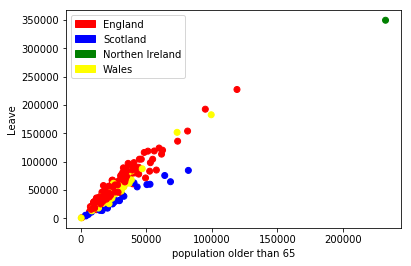

In [22]:
x = result['Age 65 to 69'].values+result['Age 70 to 74'].values+result['Age 75 to 79'].values+result['Age 80 to 84'].values
y = result['Leave'].values
plt.scatter(x,y, label="origial data",color=my_col)


red_patch = mpatches.Patch(color='red', label='England')
blue_patch = mpatches.Patch(color='blue', label='Scotland')
green_patch = mpatches.Patch(color='green', label='Northen Ireland')
yellow_patch = mpatches.Patch(color='yellow', label='Wales')

plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.xlabel("population older than 65")
plt.ylabel('Leave')
plt.show()

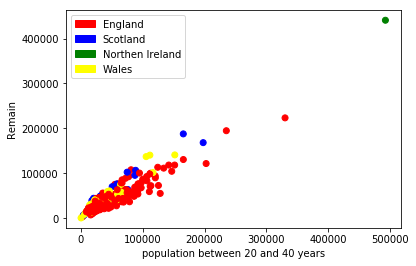

In [23]:
x = result['Age 20 to 24'].values+result['Age 25 to 29'].values+result['Age 30 to 34'].values+result['Age 35 to 39'].values
y = result['Remain'].values
plt.scatter(x,y, label="origial data",color=my_col)


red_patch = mpatches.Patch(color='red', label='England')
blue_patch = mpatches.Patch(color='blue', label='Scotland')
green_patch = mpatches.Patch(color='green', label='Northen Ireland')
yellow_patch = mpatches.Patch(color='yellow', label='Wales')

plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.xlabel("population between 20 and 40 years")
plt.ylabel('Remain')
plt.show()

### We can see that the amount of votes to leave increases as the older population increases while the amount of votes to remain increases as the younger population increases. The media information was right.

## Applying PCA in order to detect the most important numerical variables to use

In [24]:
from matplotlib.mlab import PCA as mlabPCA 
from sklearn import preprocessing 


In [25]:
#We can only apply PCA in the numerical variables
num=result._get_numeric_data()
my_numeric =list(num)
my_not_numeric = list(set(list(result)) - set(my_numeric))
d=num.values

In [26]:
#Applying mlabPCA we don't need to standarize the variables, it does it directly
d_pca=mlabPCA(d)
#principal components
#d_pca.Y

In [27]:
### Plotting the PCA1 and PCA2

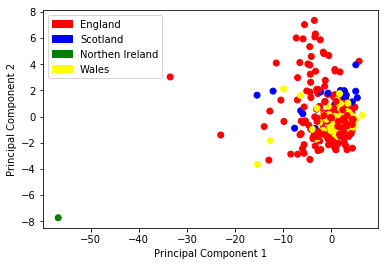

In [28]:
plt.scatter(d_pca.Y[:,0],d_pca.Y[:,1],color=my_col)

plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#### We can see that the population is not divided by the country it belongs (appart from Northen Ireland)

#### Finding the variables we can delete

In [29]:
std_scale=preprocessing.StandardScaler().fit(d)
d_std=std_scale.transform(d)
d_cov = np.cov(d_std.T)

In [30]:
d_val, dvec = np.linalg.eig(d_cov)
d_val=d_val.real
dvec=dvec.real
#dvec[:,0].reshape(1,34).T
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(d_val[i]), dvec[:,i]) for i in range(len(d_val))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

26.1701017053
2.99229529855
1.46342660074
0.882990304166
0.808977961319
0.753971239982
0.349902231324
0.189691338059
0.156395295478
0.106953949756
0.0749542699613
0.0556733479138
0.029186024816
0.0212021963075
0.0114972812166
0.00712963834814
0.00512353906327
0.00407259872935
0.00174461281959
0.0014253748381
0.00108753823582
0.000770487674316
0.000680408044814
0.000576860787541
0.000443046173114
0.000382379054357
0.000244338248031
9.20396207481e-06
1.74266813479e-08
2.5713955684e-09
4.09546585139e-16
2.77981805569e-16
9.41420150984e-17
9.41420150984e-17


In [31]:
#Pricipal component 1
eig_pairs[0][1]

array([-0.19142053, -0.1923594 , -0.19272445, -0.18309711, -0.18211268,
       -0.1850175 , -0.19240359, -0.19442428, -0.19386277, -0.19214824,
       -0.1930937 , -0.19182249, -0.18710157, -0.18411891, -0.18647192,
       -0.18668045, -0.1751473 , -0.19524854, -0.19484238, -0.19330258,
       -0.17842376, -0.15375408, -0.0758614 ,  0.04040527, -0.04695565,
       -0.04040527,  0.07881332, -0.17061573, -0.18802531, -0.17053142,
       -0.19329175, -0.19330212, -0.19330262, -0.06067989])

In [32]:
d_val.sort()

In [33]:
print('cumulated variance of the first two PCA components: ',(d_val[-1]+d_val[-2])/sum(d_val))

cumulated variance of the first two PCA components:  0.855430312114


In [34]:
m=[d_val[-i] for i in range(1,7)]
cum = []
suma=0
for i in range(6):
    suma+=m[i]/sum(d_val)
    cum.append(suma)

In [35]:
d = {'PCA components till': [1,2,3,4,5,6], 'cumulated variance': cum}
df = pd.DataFrame(data=d)
print(df.to_string(index=False))



PCA components till  cumulated variance
                  1            0.767656
                  2            0.855430
                  3            0.898357
                  4            0.924259
                  5            0.947989
                  6            0.970105


#### LOADINGS: How important is a variable for a principal component. We will delete the variables that are not supperior than 0.75 in the two first components

In [36]:
lo_1=eig_pairs[0][1]*np.sqrt(eig_pairs[0][0])
lo_2=eig_pairs[1][1]*np.sqrt(eig_pairs[1][0])

In [37]:
l1 = []
l2 = []
for i in range(len(my_numeric)):
    l1.append([my_numeric[i], abs(lo_1[i])])
    l2.append([my_numeric[i], abs(lo_2[i])])

In [38]:
delete=[] #variables to delete:
total=[] #cumulative importance of each variable in the two first components
for i in range(len(my_numeric)):
    if (l1[i][1]<0.75 and l2[i][1]<0.75):
        delete.append(l1[i][0])
    total.append([l1[i][0], l1[i][1]+l2[i][1]])
import operator
total=sorted(total,key=lambda x: -x[1])

In [39]:
#variables to delete:
delete

['No Official Mark', 'Percent Turnout', 'Writing or Mark']

#### Since we want to take into consideration the most important values we won't use the variables 'No Official Mark', 'Percent Turnout', 'Writing or Mark'

In [40]:
for i in range(len(delete)):
    del result[delete[i]]


#### writting our dataset

In [41]:
result.to_csv("Brexit_data", sep='\t', encoding='utf-8')

In [42]:
#dimension of our data
result.shape

(375, 35)

In [43]:
#multiplication:
result.shape[1]*result.shape[0]


13125